We need to make this:

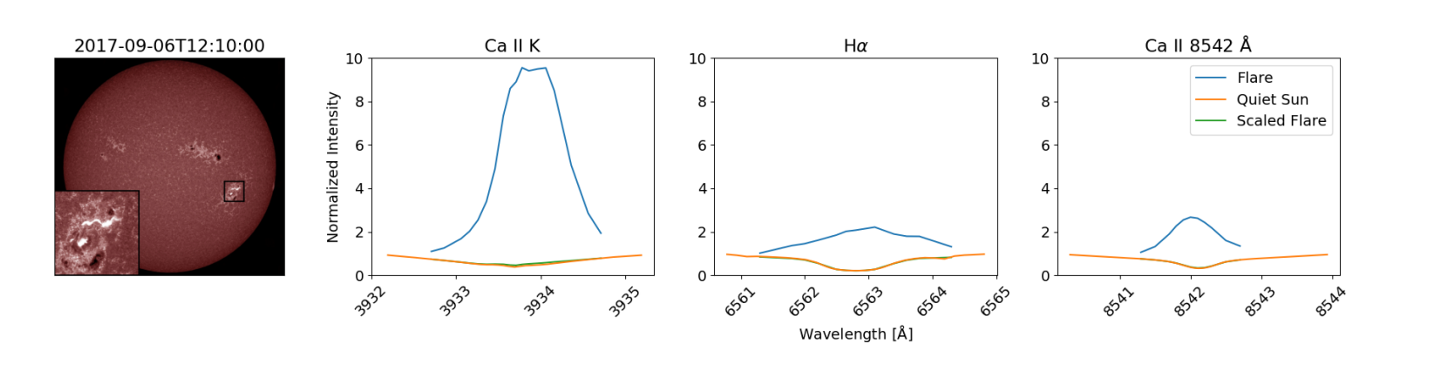

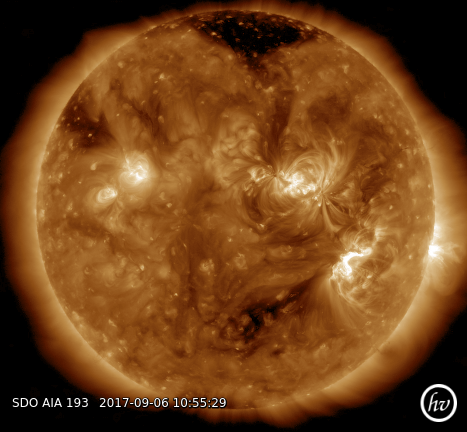

![2017_09_06_10_55_33_AIA_193 (3).png](<attachment:2017_09_06_10_55_33_AIA_193 (3).png>)

In [3]:
import sys
sys.path.append('e:\solar flares\data\\2017-09-06')

import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
# import os
from importlib import reload

# from matplotlib import cm
# import matplotlib.cbook as cbook
# import matplotlib.colors as colors
# from scipy.interpolate import interp1d
from PIL import Image
from matplotlib import transforms



sr = solar_radius = 959.63
area_factor = 60**2/np.pi/sr**2

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_6596\2576846856.py:2: SyntaxWarning: invalid escape sequence '\s'
  sys.path.append('e:\solar flares\data\\2017-09-06')


In [28]:
lines = ["CaII17", "Ha17", "CaK17" ]


    
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 

data = get_data(lines)

def get_Nessi(name_of_line):
    wav_nessi, fov_nessi, saas_nessi = data[f"nessi_{name_of_line}"]
    return wav_nessi, fov_nessi, saas_nessi
    
def get_FOV(name_of_line):
    time = data[f"TIME_{name_of_line}"]

    FOV = data[f"FOV_{name_of_line}"]
    wav_qs, qs_spec, std_qs = data[f"quiet_sun_{name_of_line}"]
    return wav_qs, time, FOV

def get_composed_spec(name_of_line):
    wav, DFD, time, line, std  = un2.difference_FD_data(name_of_line, data, quiet_sun_subtraction=False, num=100,area_factor=2.5*60**2/np.pi/959.63**2, add_noise=False)
    return wav , DFD + line 

def plot_Nessi(ax, line):
    wav_nessi, fov_nessi, saas_nessi = get_Nessi(line)
    ax.plot(wav_nessi, fov_nessi, label="FOV NESSI")
    ax.plot(wav_nessi, saas_nessi, label="SAAS NESSI")
    
def plot_FOV(ax, line, frame):
    wav_qs, time, FOV = get_FOV(line)
    ax.plot(wav_qs, FOV[frame], label="FOV SST")
    ax.set_title(f'{latex_name(line)} at {un.time_hulp(time[frame] + un.hulp_time("11:53:00"))}')
    
    wav , full = get_composed_spec(line)
    ax.plot(wav, full[frame], label="scaled flare")

    plt.legend()
    
def latex_name(name): 
    names = {"Ha":r"$\rm{H}\alpha$", 
             "CaK":r'$\rm{Ca}~\rm{II}~\rm{K}$', 
             "CaII":r'$\rm{Ca}~\rm{II}~8542~\rm{\AA}$', 
             "Fe6173":r'$\rm{Fe}~I~6173~\rm{\AA}$', 
             "Hbeta":r'$\rm{H}\beta$', 
             "CaK(2)":r'$\rm{Ca}~\rm{II}~\rm{H}$', 
             "He":r'$\rm{He}~I~5876\rm{\AA}$'}
    for k in names.keys():
        if k in name:
            return names[k]

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_6596\3592998809.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


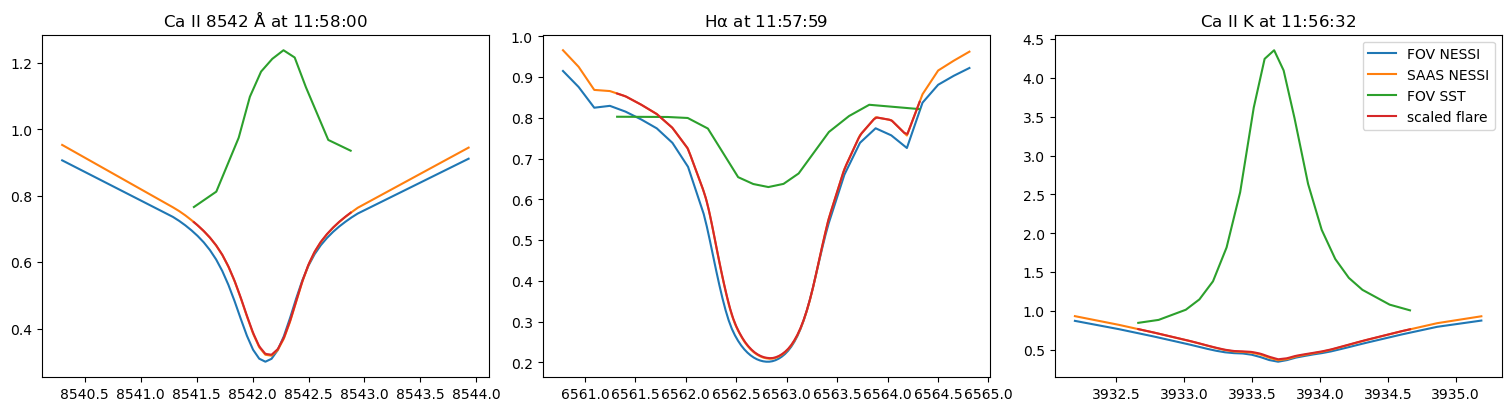

In [29]:

# make figure
rows = 1
cols = len(lines)
t = 1
fig, ax = plt.subplots(rows, cols, figsize=(5*t*cols,4*t*rows), constrained_layout=True)

title='additional plot'

# fig.suptitle(title, fontsize=20)

frame = 5

for i, line in enumerate(lines):
    plot_Nessi(ax[i], line)
    plot_FOV(ax[i], line, frame)
    



# fig.savefig(f'E:\solar flares\data\\full_analysis\Full_plots\{title.replace(" ", "_")}.pdf')


    # fig.supylabel("Minutes from start of flare [min]")
    # # fig.supxlabel(r"Wavelength [$\rm\AA$]")        ax[0, i].set_xlabel(r"Wavelength [$\rm\AA$]")
    #     ax[1, i].set_xlabel(r"Wavelength [$\rm\AA$]")
    #     ax[0, i].set_ylabel("Minutes from start of flare [min]")
    #     ax[1, i].set_ylabel("Minutes from start of flare [min]")
    #     ax[1, i].ticklabel_format(useOffset=False, axis='x')
    #     ax[0, i].ticklabel_format(useOffset=False, axis='x')

